In [62]:
from destornillador_ML import *

In [63]:
df_titanic = pd.read_csv("./data/titanic.csv")

# Mostrar las primeras filas del dataset
print("Dataset dftitanic cargado:")
print(df_titanic.head())

#Limpieza
df_titanic["age"]=df_titanic["age"].fillna(df_titanic["age"].mean())
df_titanic = df_titanic.drop(columns=["deck","parch"])

df_titanic.info()


Dataset dftitanic cargado:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0 

In [64]:
# Aplicar describe_df
resumen_dftitanic = describe_df(df_titanic)
print("\nResumen descriptivo de Titanic:")
print(resumen_dftitanic)

# Aplicar tipifica_variables
umbral_categoria = 5
umbral_continua = 70.0
clasificacion_dftitanic = tipifica_variables(df_titanic, umbral_categoria, umbral_continua)
print("\nClasificación de las variables de Titanic:")
print(clasificacion_dftitanic)


Resumen descriptivo de Titanic:
                type  null_percentage  unique_values  cardinality_percentage
survived       int64         0.000000              2                0.224467
pclass         int64         0.000000              3                0.336700
sex           object         0.000000              2                0.224467
age          float64         0.000000             89                9.988777
sibsp          int64         0.000000              7                0.785634
fare         float64         0.000000            248               27.833895
embarked      object         0.224467              3                0.336700
class         object         0.000000              3                0.336700
who           object         0.000000              3                0.336700
adult_male      bool         0.000000              2                0.224467
embark_town   object         0.224467              3                0.336700
alive         object         0.000000      

In [65]:
#Definimos target_col
target_col="survived"

In [66]:
#Hallamos las columnas numéricas
resultado = get_features_num_regression(df_titanic,target_col , 0, 0.05)
print("Columnas numéricas significativas:", resultado)


Columnas numéricas significativas: ['pclass', 'age', 'fare']


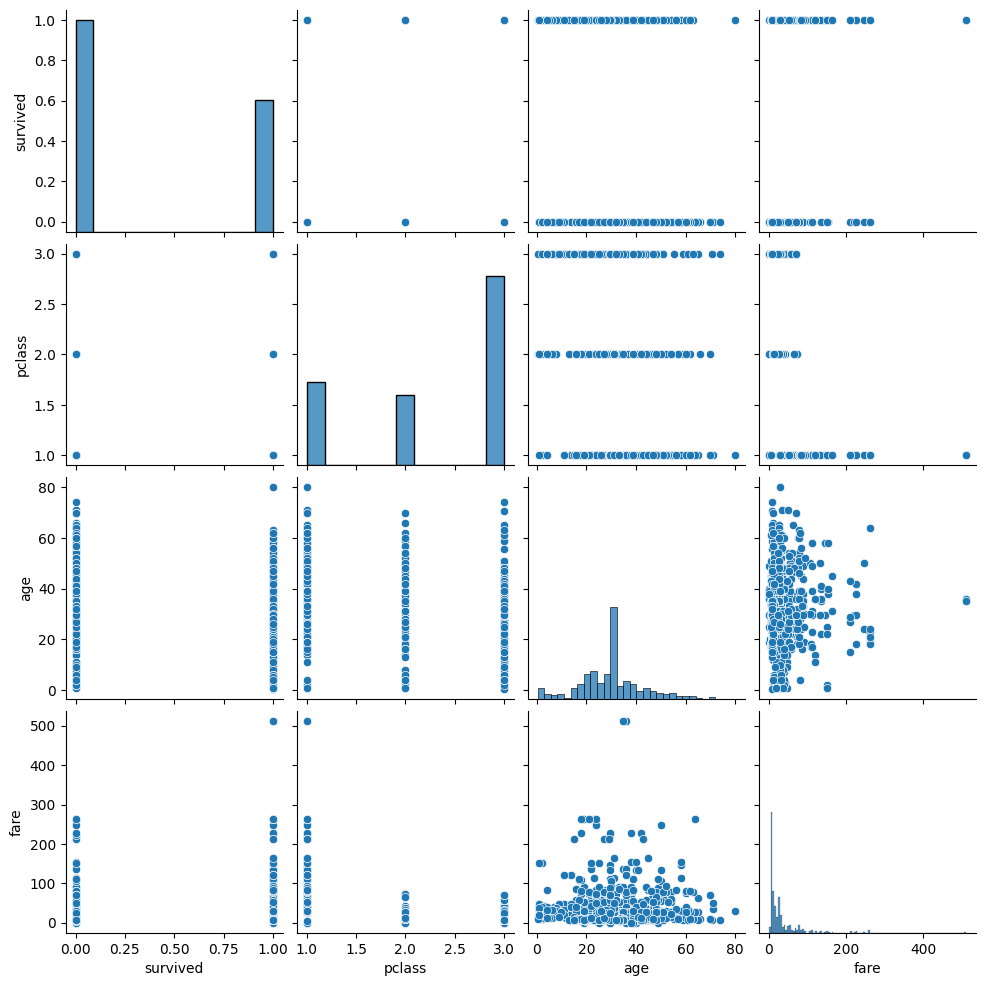

Columnas categóricas significativas: ['pclass', 'age', 'fare']


In [67]:
#Plot de variables numéricas
resultado = plot_features_num_regression(df_titanic,  target_col, columns=['pclass', 'age', 'fare'], umbral_corr=0, pvalue=None)

print("Columnas categóricas significativas:", resultado)

In [68]:
#Hallar funciones categóricas
resultado = get_features_cat_regression(df_titanic, target_col='survived', pvalue=0.05)
print("Columnas categóricas significativas:", resultado)


Columnas categóricas significativas: {'pclass': 5.510281000643817e-23, 'sex': 1.4060661308802591e-69, 'sibsp': 2.0114415916142427e-07, 'embarked': 5.483343931955073e-06, 'class': 5.510281000643817e-23, 'who': 8.998259162091177e-74, 'adult_male': 8.998259162091177e-74, 'embark_town': 5.483343931955073e-06, 'alive': 0.0, 'alone': 9.009490179329494e-10}


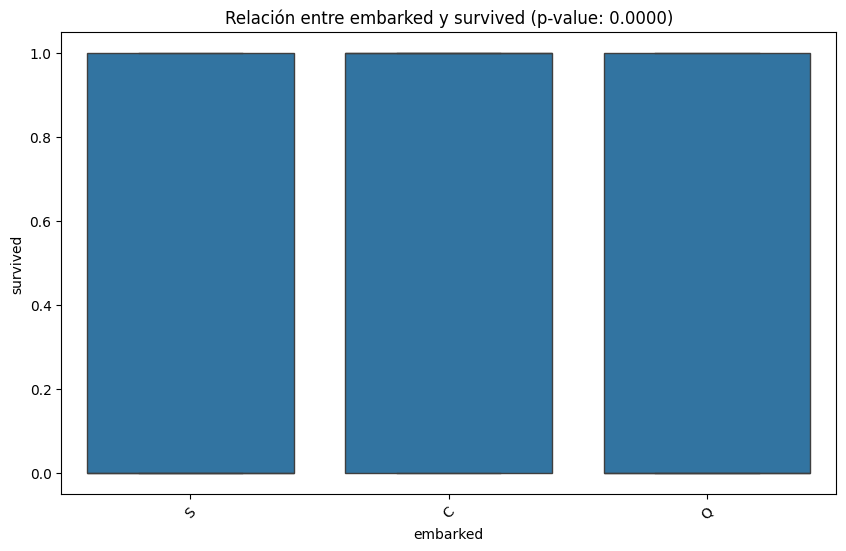

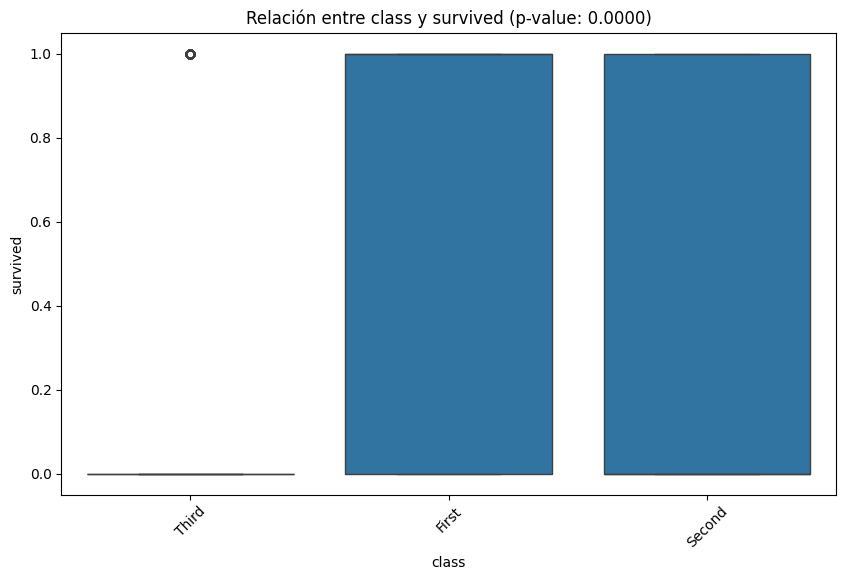

Columnas categóricas significativas: ['embarked', 'class']


In [69]:
# Llamar a la función con histogramas activados
resultado = plot_features_cat_regression(
    df_titanic, target_col='survived', columns=['embarked', 'class'], pvalue=0.05, with_individual_plot=True
)

print("Columnas categóricas significativas:", resultado)